In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("Avacado_Price.csv")

# Display the first few rows of the dataset
print(data.head())

   AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0          1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1          1.35      54876.98    674.28   44638.81     58.33     9505.56   
2          0.93     118220.22    794.70  109149.67    130.50     8145.35   
3          1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4          1.28      51039.60    941.48   43838.39     75.78     6183.95   

   Small_Bags  Large_Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany  


In [3]:
# Check the shape of the data
print(data.shape)

(18249, 12)


In [4]:
# Data Preprocessing
print(data.dtypes)
print(data.isna().sum()) # Check for null values

AveragePrice    float64
Total_Volume    float64
tot_ava1        float64
tot_ava2        float64
tot_ava3        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [5]:
# Convert categorical variables to numerical if needed
data['type'] = data['type'].map({'conventional': 0, 'organic': 1})
data['region'] = pd.factorize(data['region'])[0]

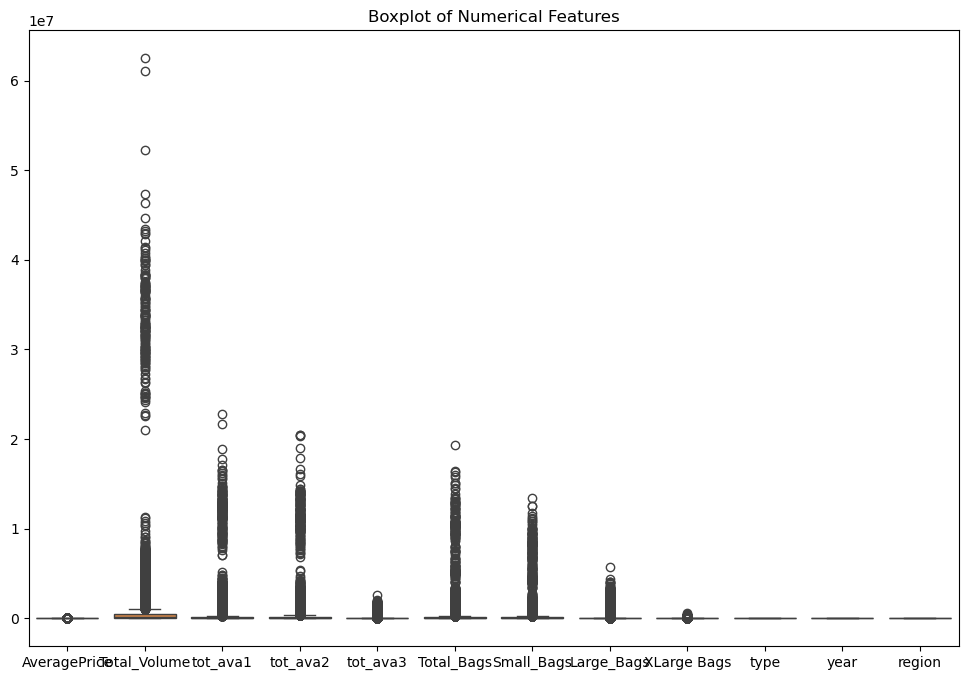

In [6]:
# Check for outliers using boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numerical Features")
plt.show()

IQR:
 AveragePrice         0.56
Total_Volume    422123.71
tot_ava1        110166.13
tot_ava2        147198.08
tot_ava3          6243.42
Total_Bags      105694.73
Small_Bags       80488.25
Large_Bags       21901.78
XLarge Bags        132.50
type                 1.00
year                 2.00
region              27.00
dtype: float64
Lower limit:
 AveragePrice         0.260
Total_Volume   -622346.985
tot_ava1       -164395.125
tot_ava2       -217788.340
tot_ava3         -9365.130
Total_Bags     -153453.455
Small_Bags     -117882.955
Large_Bags      -32725.200
XLarge Bags       -198.750
type                -1.500
year              2012.000
region             -27.500
dtype: float64
Upper limit:
 AveragePrice          2.500
Total_Volume    1066147.855
tot_ava1         276269.395
tot_ava2         371003.980
tot_ava3          15608.550
Total_Bags       269325.465
Small_Bags       204070.045
Large_Bags        54881.920
XLarge Bags         331.250
type                  2.500
year               2

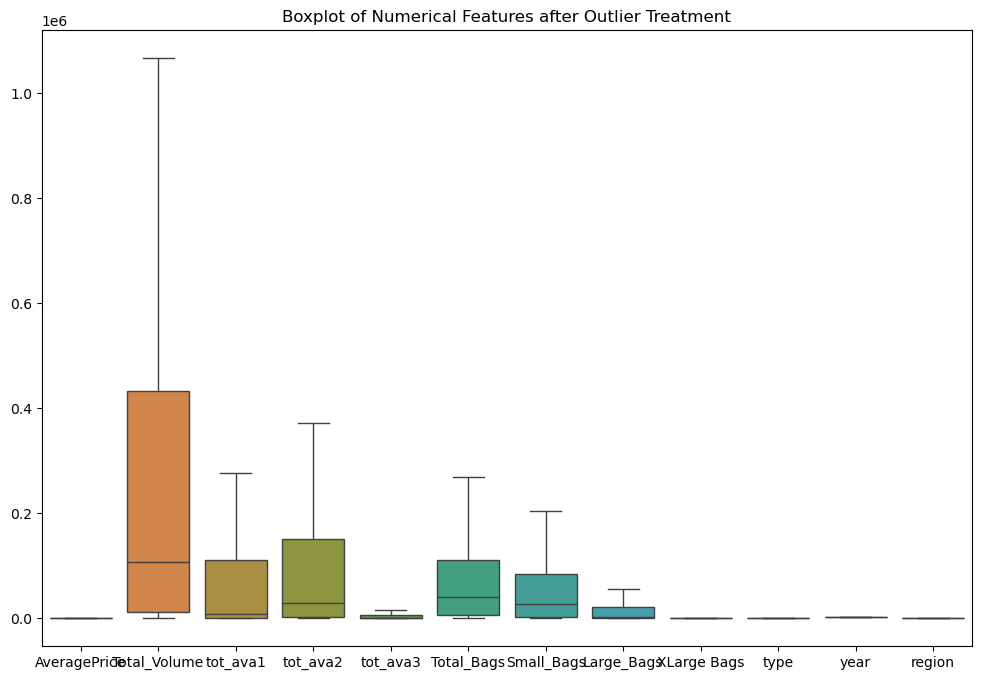

(18249, 12)


In [7]:
# Select only numerical columns for outlier treatment
numerical_cols = data.select_dtypes(include=[np.number]).columns
df = data[numerical_cols]

# Now outlier Treatment using replacement technique
IQR = df.quantile(0.75) - df.quantile(0.25)
lower_limit = df.quantile(0.25) - 1.5 * IQR
upper_limit = df.quantile(0.75) + 1.5 * IQR

print("IQR:\n", IQR)
print("Lower limit:\n", lower_limit)
print("Upper limit:\n", upper_limit)

df_replaced = df.apply(lambda x: np.where(x > upper_limit[x.name], upper_limit[x.name], 
                                          np.where(x < lower_limit[x.name], lower_limit[x.name], x)))

# Convert back to DataFrame
df_replaced = pd.DataFrame(df_replaced, columns=numerical_cols)

# Plot boxplot to see if outliers have been removed
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_replaced)
plt.title("Boxplot of Numerical Features after Outlier Treatment")
plt.show()

print(df_replaced.shape)

In [8]:
data=df_replaced

In [10]:
# Descriptive statistics
print(data.describe())

       AveragePrice  Total_Volume       tot_ava1       tot_ava2      tot_ava3  \
count  18249.000000  1.824900e+04   18249.000000   18249.000000  18249.000000   
mean       1.403668  2.889859e+05   69525.206350   98713.852159   3921.430544   
std        0.395427  3.701947e+05   99244.901205  133134.946501   5995.411078   
min        0.440000  8.456000e+01       0.000000       0.000000      0.000000   
25%        1.100000  1.083858e+04     854.070000    3008.780000      0.000000   
50%        1.370000  1.073768e+05    8645.300000   29061.020000    184.990000   
75%        1.660000  4.329623e+05  111020.200000  150206.860000   6243.420000   
max        2.500000  1.066148e+06  276269.395000  371003.980000  15608.550000   

          Total_Bags     Small_Bags    Large_Bags   XLarge Bags          type  \
count   18249.000000   18249.000000  18249.000000  18249.000000  18249.000000   
mean    77943.663114   57475.744762  14324.312070     82.932110      0.499918   
std     93026.265810   6970

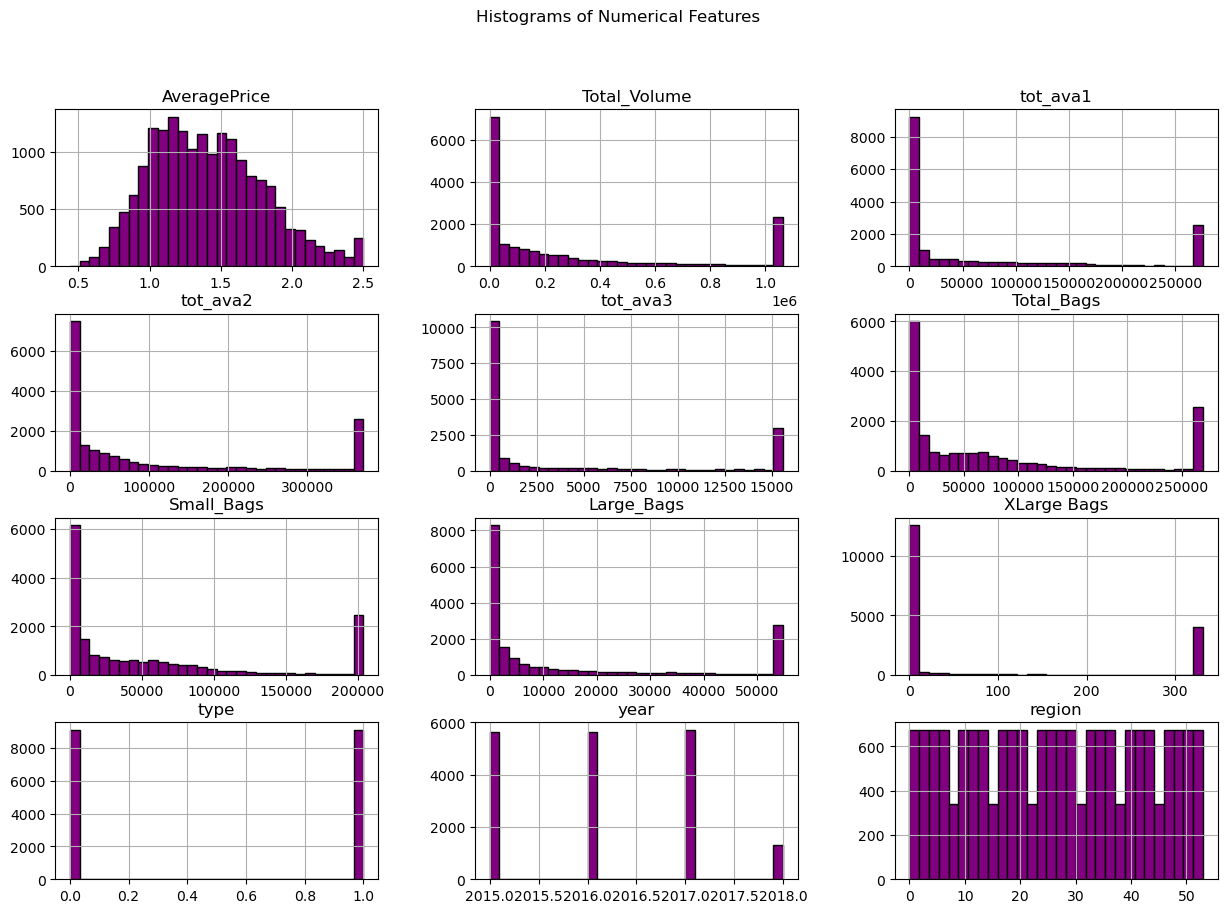

In [11]:
# Univariate Analysis
data.hist(figsize=(15, 10), bins=30, color='purple', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

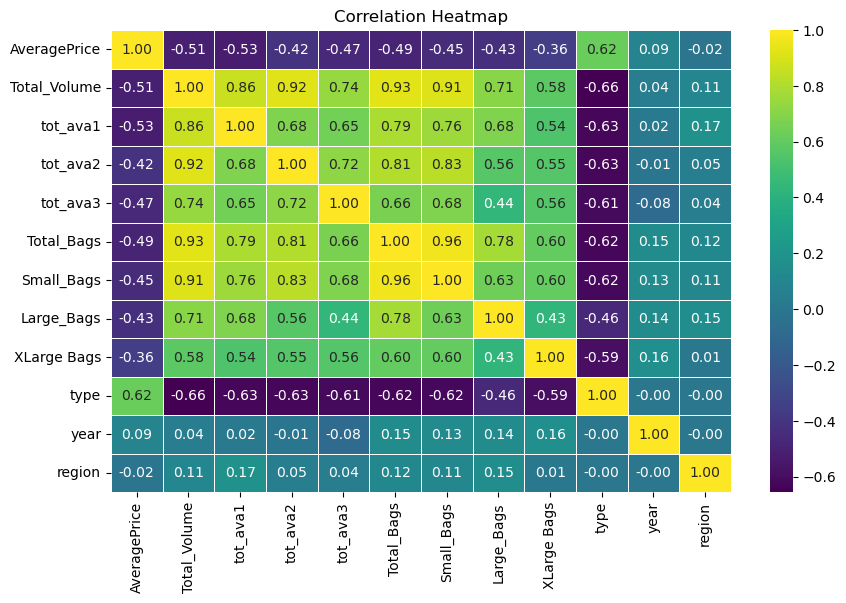

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Define numerical features and target
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('AveragePrice')
target_col = "AveragePrice"

In [15]:
# Define features (X) and target (y)
X = data[numerical_cols]
y = data[target_col]

# Split data into Train & Test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Scale numerical features (Avoid modifying X_train/X_test directly)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [17]:
# Build Multilinear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

In [19]:
# Model coefficients and feature importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients["Absolute Coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Absolute Coefficient", ascending=False)
print(coefficients)

         Feature  Coefficient  Absolute Coefficient
8           type     0.200585              0.200585
0   Total_Volume    -0.136099              0.136099
2       tot_ava2     0.133962              0.133962
4     Total_Bags    -0.107910              0.107910
5     Small_Bags     0.095798              0.095798
3       tot_ava3    -0.042616              0.042616
9           year     0.039846              0.039846
7    XLarge Bags     0.026085              0.026085
1       tot_ava1    -0.022227              0.022227
6     Large_Bags    -0.018790              0.018790
10        region     0.010232              0.010232


In [23]:
# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 0.30
R-Squared Score: 0.4409


In [24]:
# Model Tuning (Regularization)
# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))


In [25]:
# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))


In [26]:
# Compare Models
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")


Model Comparison:
Linear Regression RMSE: 0.30
Ridge Regression RMSE: 0.30
Lasso Regression RMSE: 0.32


C:\Users\viren\AppData\Local\Temp\ipykernel_14672\3242550425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Absolute Coefficient", y="Feature", data=coefficients, palette="viridis")


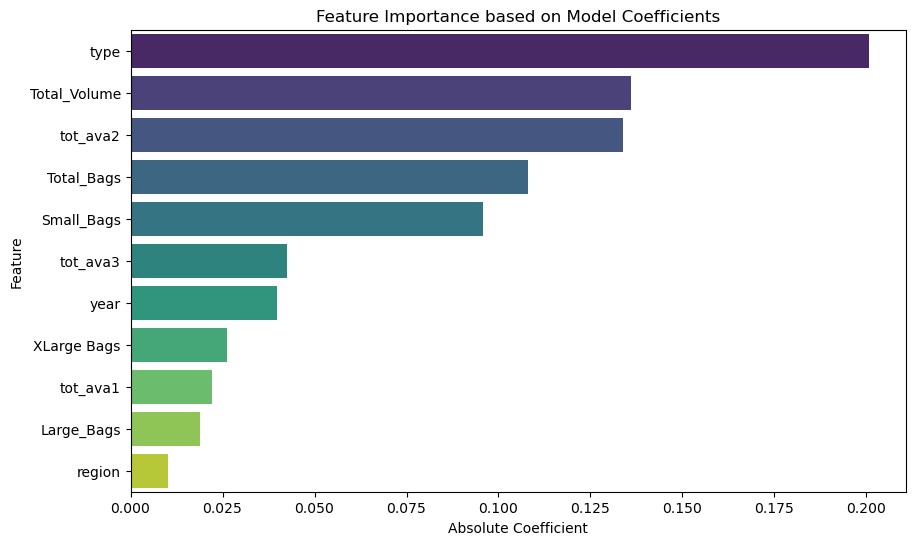

In [27]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Absolute Coefficient", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance based on Model Coefficients")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()